<a href="https://colab.research.google.com/github/ccwu0918/F0713-CPlusPlus/blob/main/C%2B%2B_Chapter07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 班級: 資工一  學號: 13913001 姓名: 吳佳駿

In [ ]:
!pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

In [ ]:
!nvcc --version

#**Chapter 7: 再談函數**



#7.1 參照與函數：prog7_1 (Page 7-2)
下面是簡單的函數的傳值範例：

In [ ]:
%%cuda
// prog7_1, 函數的傳值
#include <iostream>
#include <cstdlib>
using namespace std;
void add10(int,int);
int main(void)
{
   int a=20,b=50;
   cout << "before calling add10(): ";
   cout << "a=" << a << ", b=" << b << endl;  // 印出a、b的值
   add10(a,b);
   cout << "after called add10(): ";
   cout << "a=" << a << ", b=" << b << endl;  // 印出a、b的值
   // system("pause");
   return 0;
}

void add10(int i,int j)
{
   i=i+10;
   j=j+10;
}


#7.1.1 參照的基本認識 ：prog7_2 (Page 7-5)
下面的程式是下面的程式碼是參照的使用範例：

In [ ]:
%%cuda
// prog7_2, 參照的認識
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   int num=5;
   int &rm=num;		                   // 宣告rm為num的參照

   rm=rm+10;			               // 參照rm加10
   cout << "num=" << num << endl;	   // 印出num的值
   cout << "rm=" << rm << endl; 	   // 印出rm的值
   // system("pause");
   return 0;
}

#7.1.2 傳遞參照到函數：prog7_3 (Page 7-7)

下面是是以參照的方式傳遞到函數所撰寫而成的範例：

In [ ]:
%%cuda
// prog7_3, 傳參照到函數
#include <iostream>
#include <cstdlib>
using namespace std;
void add10(int &,int &);
int main(void)
{
   int a=20,b=50;
   cout << "before calling add10(): ";
   cout << "a=" << a << ", b=" << b << endl;  // 印出a、b的值
   add10(a,b);
   cout << "after called add10(): ";
   cout << "a=" << a << ", b=" << b << endl;  // 印出a、b的值
   // system("pause");
   return 0;
}

void add10(int &i,int &j)
{
   i=i+10;
   j=j+10;
   return;
}

#7.1.2 傳遞參照到函數：prog7_4 (Page 7-8, 7-9)

下面是是以參照的方式傳遞到函數所撰寫而成的範例：

In [ ]:
%%cuda
// prog7_4, 參照的傳遞
#include <iostream>
#include <cstdlib>
using namespace std;
void print(char,int &);
int main(void)
{
   int i,count=0;
   for(i=0;i<3;i++)
      print('*',count);
   cout << endl;
   for(i=0;i<5;i++)
      print('$',count);
   cout << endl;
   cout << "print() function is called " << count << " times.";
   cout << endl;
   // system("pause");
   return 0;
}

void print(char ch, int& cnt)	         // 自訂函數print()
{
   cout << ch;
   cnt++;
   return;
}

#7.1.3 傳回值為參照的函數：prog6_5 (Page 7-10)

下面的程式是傳回值為參照之範例：

In [ ]:
%%cuda
// prog7_5, 傳回值為參照
#include <iostream>
#include <cstdlib>
using namespace std;
int &max(int &, int &); // 宣告函數原型，其傳回值為參照
int main(void)
{
   int i = 10, j = 20;
   max(i, j) = 100; // 將max()函數傳回的參照值重設為100
   cout << "i=" << i << ",j=" << j << endl;
   // system("pause");
   return 0;
}

int &max(int &a, int &b)
{
   if (a > b)
      return a;
   else
      return b;
}

#7.2 函數的多載：prog7_6 (Page 7-10)

下面是引數型態不同的函數多載的使用範例：


In [ ]:
%%cuda
// prog7_6, 引數型態不同的函數多載
#include <iostream>
#include <cstdlib>
using namespace std;
int add(int, int); // 以多載的方式宣告函數原型
double add(double, double);
int main(void)
{
   int a = 10, b = 20;
   double x = 2.3, y = 3.5;
   cout << a << "+" << b << "=" << add(a, b) << endl;
   cout << x << "+" << y << "=" << add(x, y) << endl;
   // system("pause");
   return 0;
}

int add(int i, int j) // 自訂函數add()
{
   return i + j; // 傳回i+j的值
}

double add(double i, double j) // 自訂函數add()
{
   return i + j; // 傳回i+j的值
}

#7.2 函數的多載：prog7_7 (Page 7-13, 7-14)

下面是引數型態不同的函數多載的使用範例：


In [ ]:
%%cuda
// prog7_7, 引數個數不同的函數多載
#include <iostream>
#include <cstdlib>
using namespace std;
void print(void); // 以多載的方式宣告函數原型
void print(int);
void print(char, int);
int main(void)
{
   cout << "calling print(), ";
   print();
   cout << "calling print(8), ";
   print(8);
   cout << "calling print('+',3), ";
   print('+', 3);
   // system("pause");
   return 0;
}

void print(void) // 沒有引數的print()，印出5個*
{
   print(5); // 呼叫26~33行的print()，並傳入整數5
   return;
}

void print(int a) // 有一個引數的print()，印出a個*
{
   int i;
   for (i = 0; i < a; i++)
      cout << "*";
   cout << endl;
   return;
}

void print(char ch, int a) // 有二個引數的print()，印出a個ch
{
   int i;
   for (i = 0; i < a; i++)
      cout << ch;
   cout << endl;
   return;
}

#7.3 引數的預設值：prog7_8 (Page 7-16)

下面的程式是引數的預設值的使用範例：


In [ ]:
%%cuda
// prog7_8, 引數的預設值
#include <iostream>
#include <cstdlib>
using namespace std;
double circle(double, double pi = 3.14); // 函數原型,第2個引數預設為3.14
int main(void)
{
   cout << "circle(2.0,3.14159)=" << circle(2.0, 3.14159) << endl;
   cout << "circle(2.0)=" << circle(2.0) << endl;
   // system("pause");
   return 0;
}

double circle(double r, double pi) // circle()函數的定義，計算圓面積
{
   return (pi * r * r);
}

#7.3 引數的預設值：prog7_9 (Page 7-18)

下面的程式是引數的預設值的使用範例：

In [ ]:
%%cuda
// prog7_9, 引數的預設值
#include <iostream>
#include <cstdlib>
using namespace std;
int sum(int start=1,int end=10,int di=1);	// 函數原型
int main(void)
{
   cout << "sum()=" << sum() << endl;
   cout << "sum(2)=" << sum(2) << endl;
   cout << "sum(2,8)=" << sum(2,8) << endl;
   cout << "sum(1,15,3)=" << sum(1,15,3) << endl;
   // system("pause");
   return 0;
}

int sum(int start,int end,int di)   		// 計算數值的累加
{
   int i,total=0;
   for(i=start;i<=end;i+=di)
      total+=i;
   return total;
}

#7.4 前置處理器的指令 #define

#7.4.1 靜態區域變數：prog7_10 (Page 7-20)

下面的程式是使用#define的範例：

In [ ]:
%%cuda
// prog7_10, 使用#define
#include <iostream>
#include <cstdlib>
using namespace std;
#define PI 3.14
void peri(double),area(double);
int main(void)
{
   double r=1.0;
   cout << "pi=" << PI << endl;
   cout << "radius=" << r << endl;
   peri(r);		                // 呼叫自訂的函數
   area(r);
   // system("pause");
   return 0;
}

void peri(double r)	            // 自訂的函數peri()，印出圓周
{
   cout << "peripheral length=" << 2*PI*r << endl;
   return;
}

void area(double r)	            // 自訂的函數area()，印出圓面積
{
   cout << "area=" << PI*r*r << endl;
   return;
}

#7.4.1 靜態區域變數：prog7_11 (Page 7-21)

下面的程式是使用#define的範例：

In [ ]:
%%cuda
// prog7_11, 使用#define
#include <iostream>
#include <cstdlib>
using namespace std;
#define WORD "Absence diminishes little passions \
and increases great ones."
int main(void)
{
   cout << WORD << endl;
   // system("pause");
   return 0;
}

#7.4.2 為什麼要使用#define



* 可以增加程式的易讀性，即看到識別名稱通常就能夠明白所代表的意義
* 需要修改所定義的內容時，只要在相關的 #define指令中更改即可
* 在某些場合可增加程式執行的速度


#7.4.3 const修飾子：prog7_12 (Page 7-23)

下面的程式定義const來宣告變數的範例：

In [ ]:
%%cuda
// prog7_12, 使用const
#include <iostream>
#include <cstdlib>
using namespace std;
int main(void)
{
   const short int max=4;
   int i;
   for(i=1;i<=max;i++)		// 計算i的平方
      cout << i << "*" << i << "=" << i*i << "\t";
   system("pause");
   return 0;
}

#7.4.4 const修飾子：prog7_13 (Page 7-24)

下面是利用巨集定義函數的範例：

In [ ]:
%%cuda
// prog7_13, 使用巨集
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER i *i *i
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i的3次方
   cout << i << "*" << i << "*" << i << "=" << POWER << endl;
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog7_13.cpp
// prog7_13, 使用巨集
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER i *i *i
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i的3次方
   cout << i << "*" << i << "*" << i << "=" << POWER << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog7_13.cpp -o prog7_13

In [ ]:
!./prog7_13

#7.4.5 使用有引數的巨集：prog7_14 (Page 7-25)

巨集也可以使用引數，如下面的程式所示：

In [ ]:
%%cuda
// prog7_14, 使用巨集
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER(X) X*X*X
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i的3次方
   cout << i << "*" << i << "*" << i << "=" << POWER(i) << endl;
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog7_14.cpp
// prog7_14, 使用巨集
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER(X) X*X*X
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i的3次方
   cout << i << "*" << i << "*" << i << "=" << POWER(i) << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog7_14.cpp -o prog7_14

In [ ]:
!./prog7_14

#7.4.6 巨集括號的使用：prog7_15 (Page 7-26)

將前例的POWER(i) 改成POWER(i+1) <錯誤的範例>：

In [ ]:
%%cuda
// prog7_15, 使用巨集
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER(X) X *X *X
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i+1的3次方
   cout << i + 1 << "*" << i + 1 << "*" << i + 1 << "=" << POWER(i + 1) << endl;
   // system("pause");
   return 0;
}

#7.4.6 巨集括號的使用：prog7_16 (Page 7-27)

將前例的POWER(i) 改成POWER(i+1) <正確的範例>：

In [ ]:
%%cuda
// prog7_16, 修改 prog7_15
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER(X) (X)*(X)*(X)
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i+1的3次方
   cout << i+1 << "*" << i+1 << "*" << i+1 << "=" << POWER(i+1) << endl;
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog7_16.cpp
// prog7_16, 修改 prog7_15
#include <iostream>
#include <cstdlib>
using namespace std;
#define POWER(X) (X)*(X)*(X)
int main(void)
{
   int i;
   cout << "Input an integer:";
   cin >> i;

   // 計算並印出i+1的3次方
   cout << i+1 << "*" << i+1 << "*" << i+1 << "=" << POWER(i+1) << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog7_16.cpp -o prog7_16

In [ ]:
!./prog7_16

#7.4.7 使用函數還是巨集？




* 使用巨集時可以代替簡單的函數
* 程式裡使用到某巨集n次，在編譯時就會產生n段相同的程式碼，因此編譯後的程式碼會稍大
* 巨集佔用的記憶體較多，但是程式的控制權不用移轉，執行的速度較快
* 在複雜巢狀迴圈裡使用巨集，會比較容易感覺到執行效率的增加

#6.3.5 靜態外部變數：prog6_10 (Page 6-28)

下面的程式可以認識靜態外部變數的生命週期與活動範圍之範例：

In [ ]:
%%cuda
// prog6_11, 暫存器變數 下面的程式是使用暫存器變數的範例
#include <iostream>
#include <cstdlib>
#include <ctime>
#include <iomanip>
using namespace std;
int main(void)
{
   time_t start, end;
   register int i,j;            // 定義暫存器整數變數i與j
   start = time(NULL);	        // 記錄開始時間
   for(i = 1; i <= 50; i++)
   {
      for(j = 1; j <= 50; j++)
      {
         cout << setw(2) << i << " * " << setw(2) << j;
         cout << " = " << setw(4) << i * j << "\t";
      }
      cout << endl;
   }
   end = time(NULL);	            // 記錄結束時間
   cout << "It spends " << difftime(end, start) << " seconds";
   // system("pause");
   return 0;
}

#7.5 前置處理器--#include

#7.5.1 標準的標頭檔： (Page 7-28)

下圖為iostream的一隅：


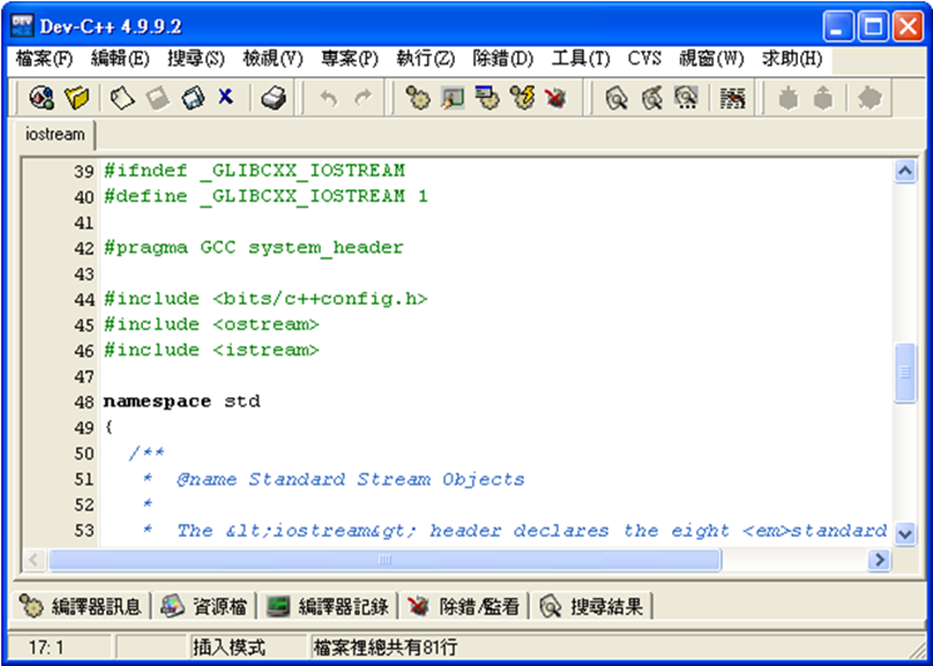

#7.5.2 使用自訂的標頭檔：prog7_17 (Page 7-30, 7-31)

下面的程式碼是以標頭檔area.h為例，計算三角形的面積的範例：


In [ ]:
%%writefile ./area.h
#define PI 3.14
#define CIRCLE(r) ((PI)*(r)*(r))
#define RECTANGLE(length,height) ((length)*(height))
#define TRIANGLE(base,height) ((base)*(height)/2)

In [ ]:
%%cuda
// prog7_17, 使用自訂的標頭檔area.h
#include <iostream>
#include <cstdlib>
using namespace std;
#include "/content/area.h"
int main(void)
{
   float base,height;
   cout << "Input the base of triangle:";
   cin >> base;
   cout << "Input the height of triangle:";
   cin >> height;
   // 計算三角形面積
   cout << "The area of triangle is " << TRIANGLE(base,height) << endl;
   // system("pause");
   return 0;
}

In [ ]:
%%writefile prog7_17.cpp
// prog7_17, 使用自訂的標頭檔area.h
#include <iostream>
#include <cstdlib>
using namespace std;
#include "/content/area.h"
int main(void)
{
   float base,height;
   cout << "Input the base of triangle:";
   cin >> base;
   cout << "Input the height of triangle:";
   cin >> height;
   // 計算三角形面積
   cout << "The area of triangle is " << TRIANGLE(base,height) << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog7_17.cpp -o prog7_17

In [ ]:
!./prog7_17

#7.6 命令列引數的使用：prog7_18 (Page 7-33, 7-34)

下面的程式是命令列引數的使用範例：

In [ ]:
%%writefile prog7_18.cpp
// prog7_18, 命令列引數的使用
#include <iostream>
#include <cstdlib>
using namespace std;
int main(int argc, char *argv[])
{
   int i ;
   cout << "The value of argc is " << argc;  // 印出命令列引數的內容
   cout << endl;
   for(i=0;i<argc;i++)
      cout << "argv[" << i << "]=" << argv[i] << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog7_18.cpp -o prog7_18

In [ ]:
!./prog7_18 How do you do

#7.6 命令列引數的使用：prog7_19 (Page 7-34, 7-35)

下面的程式是另一個命令列引數的使用範例：

In [ ]:
%%writefile prog7_19.cpp
// prog7_19, 命令列引數的使用
#include <iostream>
#include <cstdlib>
using namespace std;
int main(int argc, char *argv[])
{
   int a = atoi(argv[1]); // 將命令列引數轉換成數值
   int b = atoi(argv[2]);
   cout << a << "+" << b << "=" << a + b << endl;
   // system("pause");
   return 0;
}

In [ ]:
!g++ prog7_19.cpp -o prog7_19

In [ ]:
!./prog7_19 2 5



---



# 習題：7.1 參照與函數：



### hw7_1. 試利用void sum(int &,int &) 函數，傳入a、b兩個整數，於函數中計算a+b之值，並將計算結果存入a中。a與b的值請自行設定：



In [ ]:
%%cuda
// hw7_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void sum(int &,int &);
int main(void)
{
   int a=6, b=10;
   sum(a, b);
   cout << "a=" << a << ", b=" << b << endl;

   // system("pause");
   return 0;
}

void sum(   ,    )
{

}

/* output-------
a=16, b=10
--------------*/

In [ ]:
%%writefile hw7_1.cpp
// hw7_1, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void sum(int &,int &);
int main(void)
{
   int a=6, b=10;
   sum(a, b);
   cout << "a=" << a << ", b=" << b << endl;

   // system("pause");
   return 0;
}

void sum(   ,    )
{

}

/* output-------
a=16, b=10
--------------*/

In [ ]:
!g++ hw7_1.cpp -o hw7_1

In [ ]:
!./hw7_1


### hw7_2. 試撰寫一函數，將引數a、b以大到小排列。其函數的原型為
void sort(int &,int &);：



In [ ]:
%%cuda
// hw7_2, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void sort(int &,int &);
int main(void)
{
   int a=6, b=10;
   cout << "排序前，a=" << a << ", b=" << b << endl;
   sort(a,b);
   cout << "排序後，a=" << a << ", b=" << b << endl;

   // system("pause");
   return 0;
}

void sort(    ,     )
{







}

/* output---------
排序前，a=6, b=10
排序前，a=10, b=6
----------------*/

In [ ]:
%%writefile hw7_2.cpp
// hw7_2, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void sort(int &,int &);
int main(void)
{
   int a=6, b=10;
   cout << "排序前，a=" << a << ", b=" << b << endl;
   sort(a,b);
   cout << "排序後，a=" << a << ", b=" << b << endl;

   // system("pause");
   return 0;
}

void sort(    ,     )
{







}

/* output---------
排序前，a=6, b=10
排序前，a=10, b=6
----------------*/

In [ ]:
!g++ hw7_2.cpp -o hw7_2

In [ ]:
!./hw7_2


### hw7_3. 試撰寫一函數gcd()，傳入a、b、g三個整數之參照，計算a與b的最大公因數，再設給g存放，並於呼叫gcd()後，印出g的值。請計算21與49的最大公因數。：



In [ ]:
%%cuda
// hw7_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int x = 21, y = 49, g;
   cout << "The GCD of " << x << " and " << y << " is ";
   gcd(x, y, g);
   cout << g << endl;

   // system("pause");
   return 0;
}

void gcd(    ,    ,    )
{







}

/* output------------------
The GCD of 21 and 49 is 7
-------------------------*/

In [ ]:
%%writefile hw7_3.cpp
// hw7_3, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int x = 21, y = 49, g;
   cout << "The GCD of " << x << " and " << y << " is ";
   gcd(x, y, g);
   cout << g << endl;

   // system("pause");
   return 0;
}

void gcd(    ,    ,    )
{







}

/* output------------------
The GCD of 21 and 49 is 7
-------------------------*/

In [ ]:
!g++ hw7_3.cpp -o hw7_3

In [ ]:
!./hw7_3


### hw7_4. 試撰寫一函數setvalue()，將a、b值傳入該函數後，將較小值的變數設為100，將較大值的變數設為10：



In [ ]:
%%cuda
// hw7_4, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int a=12, b=9;
   cout << "設值前，a=" << a << ", b=" << b << endl;
   setvalue(a, b);
   cout << "設值後，a=" << a << ", b=" << b << endl;

   // system("pause");
   return 0;
}

void setvalue(     ,     )
{










}

/* output---------
設值前，a=12, b=9
設值後，a=10, b=100
----------------*/

In [ ]:
%%writefile hw7_4.cpp
// hw7_4, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int a=12, b=9;
   cout << "設值前，a=" << a << ", b=" << b << endl;
   setvalue(a, b);
   cout << "設值後，a=" << a << ", b=" << b << endl;

   // system("pause");
   return 0;
}

void setvalue(     ,     )
{










}

/* output---------
設值前，a=12, b=9
設值後，a=10, b=100
----------------*/

In [ ]:
!g++ hw7_4.cpp -o hw7_4

In [ ]:
!./hw7_4


### hw7_5. 試撰寫一函數max()，傳入兩個整數，將較大值的參照傳回並列印出來：



In [ ]:
%%cuda
// hw7_5, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int &max(int &,int &);
int main(void)
{
   int a = 16, b = 23;
   cout << "a = " << a << ", b = " << b << endl;
   cout << max(a, b) << "較大" << endl;

   // system("pause");
   return 0;
}

int &max(int &x, int &y)
{




}

/* output---------
a = 16, b = 23
23較大
----------------*/

In [ ]:
%%writefile hw7_5.cpp
// hw7_5, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int &max(int &,int &);
int main(void)
{
   int a = 16, b = 23;
   cout << "a = " << a << ", b = " << b << endl;
   cout << max(a, b) << "較大" << endl;

   // system("pause");
   return 0;
}

int &max(int &x, int &y)
{




}

/* output---------
a = 16, b = 23
23較大
----------------*/

In [ ]:
!g++ hw7_5.cpp -o hw7_5

In [ ]:
!./hw7_5

# 習題：7.2 函數的多載  

### hw7_6. 試撰寫max() 函數的多載，其中max引數的型態為int，且可以有兩個或三個引數，函數的傳回值為這些引數的最大值，傳回值的型態也是int：



In [ ]:
%%cuda
// hw7_6, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int max(int, int);
int max(int, int, int);
int main(void)
{
   cout << "max(8,2)=" << max(8,2) << endl;
   cout << "max(1,5,9)=" << max(1,5,9) << endl;

   // system("pause");
   return 0;
}

int max(int a, int b)
{




}

int max(int a,int b,int c)
{






}

/* output-----
max(8,2)=8
max(1,5,9)=9
-------------*/

In [ ]:
%%writefile hw7_6.cpp
// hw7_6, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int max(int, int);
int max(int, int, int);
int main(void)
{
   cout << "max(8,2)=" << max(8,2) << endl;
   cout << "max(1,5,9)=" << max(1,5,9) << endl;

   // system("pause");
   return 0;
}

int max(int a, int b)
{




}

int max(int a,int b,int c)
{






}

/* output-----
max(8,2)=8
max(1,5,9)=9
-------------*/

In [ ]:
!g++ hw7_6.cpp -o hw7_6

In [ ]:
!./hw7_6

### hw7_7. 試撰寫min() 函數的多載，引數的型態為double，且可以有兩個或三個引數，函數的傳回值為這些引數的最小值，傳回值的型態也是double：



In [ ]:
%%cuda
// hw7_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
double min(double,double);
double min(double,double,double);
int main(void)
{
   cout << "min(8.3,12.5)=" << min(8.3,12.5) << endl;
   cout << "min(5.8,7.12,3.69)=" << min(5.8,7.12,3.69) << endl;

   // system("pause");
   return 0;
}

double min(double a,double b)
{




}

double min(double a,double b,double c)
{






}

/* output----------------
min(8.3,12.5)=8.3
min(5.8,7.12,3.69)=3.69
-----------------------*/

In [ ]:
%%writefile hw7_7.cpp
// hw7_7, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
double min(double,double);
double min(double,double,double);
int main(void)
{
   cout << "min(8.3,12.5)=" << min(8.3,12.5) << endl;
   cout << "min(5.8,7.12,3.69)=" << min(5.8,7.12,3.69) << endl;

   // system("pause");
   return 0;
}

double min(double a,double b)
{




}

double min(double a,double b,double c)
{






}

/* output----------------
min(8.3,12.5)=8.3
min(5.8,7.12,3.69)=3.69
-----------------------*/

In [ ]:
!g++ hw7_7.cpp -o hw7_7

In [ ]:
!./hw7_7

### hw7_8. 試撰寫proverb() 函數的多載，用來列印數行字串。當沒有引數傳入函數時，即印出字串 "Two heads are better than one."；當引數為整數k時，即印出k行上述字串：



In [ ]:
%%cuda
// hw7_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void proverb(void);
void proverb(int);
int main(void)
{
   cout << "呼叫proverb()..." << endl;
   proverb();
   cout << endl << "呼叫proverb(3)..." << endl;
   proverb(3);

   // system("pause");
   return 0;
}

void proverb(void)
{
	proverb(1);
}

void proverb(int k)
{


}

/* output-------------------------
呼叫proverb()...
Two heads are better than one.

呼叫proverb(3)...
Two heads are better than one.
Two heads are better than one.
Two heads are better than one.
--------------------------------*/

In [ ]:
%%writefile hw7_8.cpp
// hw7_8, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
void proverb(void);
void proverb(int);
int main(void)
{
   cout << "呼叫proverb()..." << endl;
   proverb();
   cout << endl << "呼叫proverb(3)..." << endl;
   proverb(3);

   // system("pause");
   return 0;
}

void proverb(void)
{
	proverb(1);
}

void proverb(int k)
{


}

/* output-------------------------
呼叫proverb()...
Two heads are better than one.

呼叫proverb(3)...
Two heads are better than one.
Two heads are better than one.
Two heads are better than one.
--------------------------------*/

In [ ]:
!g++ hw7_8.cpp -o hw7_8

In [ ]:
!./hw7_8

### hw7_9. 試撰寫一組可以計算梯形面積的多載化函數，格式為trapezoid(upper, base, height)，upper 、base與height可同為int或double，傳回值的型態皆為double：

`（ 梯形面積 = (upper+base)* height/2 ）`


In [ ]:
%%cuda
// hw7_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
double trapezoid(int,int,int);
double trapezoid(double,double,double);
int main(void)
{
   cout << "梯形的上底為6, 下底為8, 高為3, ";
   cout << "面積為" << trapezoid(6,8,3) << endl;
   cout << "梯形的上底為4.8, 下底為3.7, 高為2.5, ";
   cout << "面積為" << trapezoid(4.8,3.7,2.5) << endl;

   // system("pause");
   return 0;
}

double trapezoid(int upper,int base,int height)
{
	return                  ;
}

double trapezoid(double upper,double base,double height)
{
	return                  ;
}

/* output----------------------------------------
梯形的上底為6, 下底為8, 高為3, 面積為21
梯形的上底為4.8, 下底為3.7, 高為2.5, 面積為10.625
-----------------------------------------------*/

In [ ]:
%%writefile hw7_9.cpp
// hw7_9, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
double trapezoid(int,int,int);
double trapezoid(double,double,double);
int main(void)
{
   cout << "梯形的上底為6, 下底為8, 高為3, ";
   cout << "面積為" << trapezoid(6,8,3) << endl;
   cout << "梯形的上底為4.8, 下底為3.7, 高為2.5, ";
   cout << "面積為" << trapezoid(4.8,3.7,2.5) << endl;

   // system("pause");
   return 0;
}

double trapezoid(int upper,int base,int height)
{
	return                  ;
}

double trapezoid(double upper,double base,double height)
{
	return                  ;
}

/* output----------------------------------------
梯形的上底為6, 下底為8, 高為3, 面積為21
梯形的上底為4.8, 下底為3.7, 高為2.5, 面積為10.625
-----------------------------------------------*/

In [ ]:
!g++ hw7_9.cpp -o hw7_9

In [ ]:
!./hw7_9

### hw7_10. 試撰寫power(x,n) 函數的多載，用來計算x的n次方，n為int型態，當引數x的型態為int時，函數的傳回值型態為int；引數x的型態為double，函數的傳回值型態即為double：


In [ ]:
%%cuda
// hw7_10, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int power(int,int);
double power(double,int);
int main(void)
{
   cout << "power(5,3)=" << power(5,3) << endl;
   cout << "power(2.5,2)=" << power(2.5,2) << endl;

   // system("pause");
   return 0;
}

int power(int x,int n)
{




}

double power(double x,int n)
{





}

/* output---------
power(5,3)=125
power(2.5,2)=6.25
----------------*/

In [ ]:
%%writefile hw7_10.cpp
// hw7_10, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int power(int,int);
double power(double,int);
int main(void)
{
   cout << "power(5,3)=" << power(5,3) << endl;
   cout << "power(2.5,2)=" << power(2.5,2) << endl;

   // system("pause");
   return 0;
}

int power(int x,int n)
{




}

double power(double x,int n)
{





}

/* output---------
power(5,3)=125
power(2.5,2)=6.25
----------------*/

In [ ]:
!g++ hw7_10.cpp -o hw7_10

In [ ]:
!./hw7_10

# 習題：7.3 引數的預設值

### hw7_11. 11.	試撰寫一函數int max(int a,int b)，引數為2個整數，傳回較大值。若是只傳入1個引數時，則將第2個引數的預設值設為10：



In [ ]:
%%cuda
// hw7_11, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << "max(5)=" << max(5) << endl;
   cout << "max(5,3)=" << max(5,3) << endl;

   // system("pause");
   return 0;
}

int max(int a,int b)
{
   if(a>b)
      return a;
   else
      return b;
}

/* output---------
max(5)=10
max(5,3)=5
----------------*/

In [ ]:
%%writefile hw7_11.cpp
// hw7_11, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << "max(5)=" << max(5) << endl;
   cout << "max(5,3)=" << max(5,3) << endl;

   // system("pause");
   return 0;
}

int max(int a,int b)
{
   if(a>b)
      return a;
   else
      return b;
}

/* output---------
max(5)=10
max(5,3)=5
----------------*/

In [ ]:
!g++ hw7_11.cpp -o hw7_11

In [ ]:
!./hw7_11

### hw7_12. 試撰寫一函數int power(int x,int n)，用來計算x的n次方。預設的x與n值皆為1。請分別計算power()、power(5)、power(3,2)之值：



In [ ]:
%%cuda
// hw7_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << "power()=" << power() << endl;
   cout << "power(5)=" << power(5) << endl;
   cout << "power(3,2)=" << power(3,2) << endl;

   // system("pause");
   return 0;
}

int power(int x,int n)
{
   int p=1;
   for(int i=0;i<n;i++)
      p*=x;
   return p;
}

/* output----------------
power()=1
power(5)=5
power(3,2)=9
-----------------------*/

In [ ]:
%%writefile hw7_12.cpp
// hw7_12, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << "power()=" << power() << endl;
   cout << "power(5)=" << power(5) << endl;
   cout << "power(3,2)=" << power(3,2) << endl;

   // system("pause");
   return 0;
}

int power(int x,int n)
{
   int p=1;
   for(int i=0;i<n;i++)
      p*=x;
   return p;
}

/* output----------------
power()=1
power(5)=5
power(3,2)=9
-----------------------*/

In [ ]:
!g++ hw7_12.cpp -o hw7_12

In [ ]:
!./hw7_12

### hw7_13. 13.	試撰寫一函數double avg(int a, int b,int c)，可以於函數中印出a、b、c的值，並傳回三個整數的平均值。預設的第二個引數值為5，預設的第三個引數值為7。請分別計算avg(13)、avg(9,16)、avg(8,17,3)之值：

In [ ]:
%%cuda
// hw7_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << avg(13) << endl;
   cout << avg(9,16) << endl;
   cout << avg(8,17,3) << endl;

   // system("pause");
   return 0;
}

   avg(    ,    ,    )
{



}

/* output--------------------------
a=13, b=5, c=7, average=8.33333
a=9, b=16, c=7, average=10.6667
a=8, b=17, c=3, average=9.33333
---------------------------------*/

In [ ]:
%%writefile hw7_13.cpp
// hw7_13, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << avg(13) << endl;
   cout << avg(9,16) << endl;
   cout << avg(8,17,3) << endl;

   // system("pause");
   return 0;
}

   avg(    ,    ,    )
{



}

/* output--------------------------
a=13, b=5, c=7, average=8.33333
a=9, b=16, c=7, average=10.6667
a=8, b=17, c=3, average=9.33333
---------------------------------*/

In [ ]:
!g++ hw7_13.cpp -o hw7_13

In [ ]:
!./hw7_13

### hw7_14. 試撰寫一函數double triangle(int base,int height)，可以於函數中印出三角形的底與高之值，並傳回三角形面積。預設的base值為2，height值為1。請分別計算triangle()、triangle(10)、triangle(12,3)之值：

In [ ]:
%%cuda
// hw7_14, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << triangle() << endl;
   cout << triangle(10) << endl;
   cout << triangle(12,3) << endl;

   // system("pause");
   return 0;
}

double triangle(int base,int height)
{
   cout << "base=" << base << ", height=" << height;
   cout << ", area=";
   return (base*height/2.0);
}

/* output--------------------------
base=2, height=1, area=1
base=10, height=1, area=5
base=12, height=3, area=18
---------------------------------*/

In [ ]:
%%writefile hw7_14.cpp
// hw7_14, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << triangle() << endl;
   cout << triangle(10) << endl;
   cout << triangle(12,3) << endl;

   // system("pause");
   return 0;
}

double triangle(int base,int height)
{
   cout << "base=" << base << ", height=" << height;
   cout << ", area=";
   return (base*height/2.0);
}

/* output--------------------------
base=2, height=1, area=1
base=10, height=1, area=5
base=12, height=3, area=18
---------------------------------*/

In [ ]:
!g++ hw7_14.cpp -o hw7_14

In [ ]:
!./hw7_14

# 習題：7.4 前置處理器--#define  



### hw7_15. 試利用#define指令，印出字串 "Rome was not built in a day."：

In [ ]:
%%cuda
// hw7_15, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << PROVERBS << endl;

   // system("pause");
   return 0;
}

/* output--------------------
Rome was not built in a day.
---------------------------*/

In [ ]:
%%writefile hw7_15.cpp
// hw7_15, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   cout << PROVERBS << endl;

   // system("pause");
   return 0;
}

/* output--------------------
Rome was not built in a day.
---------------------------*/

In [ ]:
!g++ hw7_15.cpp -o hw7_15

In [ ]:
!./hw7_15

### hw7_16. 試定義巨集函數SUM，用來計算引數X與Y的和，並於程式中分別計算10+5與4.6+3.8之值：

In [ ]:
%%cuda
// hw7_16, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int a=10, b=5;
   double x=4.6, y=3.8;
   cout << "SUM(" << a << "," << b << ")=";
   cout << SUM(a,b) << endl;
   cout << "SUM(" << x << "," << y << ")=";
   cout << SUM(x,y) << endl;

   // system("pause");
   return 0;
}

/* output---------
SUM(10,5)=15
SUM(4.6,3.8)=8.4
----------------*/

In [ ]:
%%writefile hw7_16.cpp
// hw7_16, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int a=10, b=5;
   double x=4.6, y=3.8;
   cout << "SUM(" << a << "," << b << ")=";
   cout << SUM(a,b) << endl;
   cout << "SUM(" << x << "," << y << ")=";
   cout << SUM(x,y) << endl;

   // system("pause");
   return 0;
}

/* output---------
SUM(10,5)=15
SUM(4.6,3.8)=8.4
----------------*/

In [ ]:
!g++ hw7_16.cpp -o hw7_16

In [ ]:
!./hw7_16

### hw7_17. 試利用條件運算子「?:」建立一個名為MAX的巨集，用來傳回2個引數中較大的值。並請分別比較12、6與3.6、9.7何者較大：

In [ ]:
%%cuda
// hw7_17, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int a=12, b=6;
   double x=3.6, y=9.7;
   cout << "MAX(" << a << "," << b << ")=";
   cout << MAX(a,b) << endl;
   cout << "MAX(" << x << "," << y << ")=";
   cout << MAX(x,y) << endl;

   // system("pause");
   return 0;
}

/* output----------
MAX(12,6)=12
MAX(3.6,9.7)=9.7
-----------------*/

In [ ]:
%%writefile hw7_17.cpp
// hw7_17, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;

int main(void)
{
   int a=12, b=6;
   double x=3.6, y=9.7;
   cout << "MAX(" << a << "," << b << ")=";
   cout << MAX(a,b) << endl;
   cout << "MAX(" << x << "," << y << ")=";
   cout << MAX(x,y) << endl;

   // system("pause");
   return 0;
}

/* output----------
MAX(12,6)=12
MAX(3.6,9.7)=9.7
-----------------*/

In [ ]:
!g++ hw7_17.cpp -o hw7_17

In [ ]:
!./hw7_17

### hw7_18. 試定義一巨集函數VOLUMN，傳入半徑，即可計算球的體積。 值請用#define定義成3.1415926，並計算當半徑為1~5時的球體積之值：



```
（ 球體積 =  (4/3)×π×r^3）
```



image.png

In [ ]:
%%cuda
// hw7_18, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define PI 3.1415926

int main(void)
{
   for(int r=1;r<=5;r++)
      cout << "半徑=" << r << ", 球體積=" << VOLUMN(r) << endl;

   // system("pause");
   return 0;
}

/* output-------------
半徑=1, 球體積=4.18879
半徑=2, 球體積=33.5103
半徑=3, 球體積=113.097
半徑=4, 球體積=268.083
半徑=5, 球體積=523.599
--------------------*/

In [ ]:
%%writefile hw7_18.cpp
// hw7_18, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
#define PI 3.1415926

int main(void)
{
   for(int r=1;r<=5;r++)
      cout << "半徑=" << r << ", 球體積=" << VOLUMN(r) << endl;

   // system("pause");
   return 0;
}

/* output-------------
半徑=1, 球體積=4.18879
半徑=2, 球體積=33.5103
半徑=3, 球體積=113.097
半徑=4, 球體積=268.083
半徑=5, 球體積=523.599
--------------------*/

In [ ]:
!g++ hw7_18.cpp -o hw7_18

In [ ]:
!./hw7_18

# 習題：7.5 前置處理器--#include  


### hw7_19. 19.	試將習題16與習題17的巨集寫成自訂的標頭檔myhfile.h，並利用#include含括到程式中，由鍵盤輸入兩個浮點數後，分別計算這兩個數的和及較大值。



In [ ]:
%%writefile myhfile.h
#define SUM(X,Y) (X+Y)
#define MAX(X,Y) ((X) > (Y) ? (X) : (Y))

In [ ]:
%%writefile hw7_19.cpp
// hw7_19, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>

using namespace std;
int main(void)
{
   double x,y;
   cout << "第一個數:";
   cin >> x;
   cout << "第二個數:";
   cin >> y;
   cout << "SUM(" << x << "," << y << ")=";
   cout << SUM(x,y) << endl;
   cout << "MAX(" << x << "," << y << ")=";
   cout << MAX(x,y) << endl;

   // system("pause");
   return 0;
}

/* output--------------------
第一個數:6.9
第二個數:7.3
SUM(6.9,7.3)=14.2
MAX(6.9,7.3)=7.3
---------------------------*/

In [ ]:
!g++ hw7_19.cpp -o hw7_19

In [ ]:
!./hw7_19

### hw7_20. 試撰寫一個head_math.h的自訂標頭檔，裡面定義了下面的巨集：

(a)	利用 #include將標頭檔head_math.h含括到程式中，由鍵盤輸入計算梯形所需要的資料後，計算梯形的面積。

(b)	試利用 #include將標頭檔head_math.h含括到程式中，由鍵盤輸入半徑值後，計算圓周長與球的體積。






```
(1)	 PARA(B,H)，可計算平行四邊形的面積
(2)	 TRAPEZOID(UB,LB,H)，可計算梯形的面積
(3)	 PERIPHERY(R)，可計算圓周長
(4)	 VOLUMN(R)，可計算球的體積

```



In [ ]:
%%writefile head_math.h
#define PI 3.1415926
#define PARA(B,H) ((B)*(H)/2.0)
#define TRAPEZOID(UB,LB,H) (((UB)+(LB))*(H)/2.0)
#define PERIPHERY(R) (2*PI*(R))
#define VOLUMN(R) ((4/3.0)*PI*(R)*(R)*(R))

In [ ]:
%%writefile hw7_20a.cpp
// hw7_20a, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>

using namespace std;
int main(void)
{
   double ubase,lbase,height;
   cout << "請輸入梯形的上底:";
   cin >> ubase;
   cout << "請輸入梯形的下底:";
   cin >> lbase;
   cout << "請輸入梯形的高:";
   cin >> height;
   cout << "梯形形面積=" << TRAPEZOID(ubase,lbase,height) << endl;

   // system("pause");
   return 0;
}

/* output---------------
請輸入梯形的上底:6
請輸入梯形的下底:10
請輸入梯形的高:5
梯形形面積=40
----------------------*/

In [ ]:
!g++ hw7_20a.cpp -o hw7_20a

In [ ]:
!./hw7_20a

In [ ]:
%%writefile hw7_20b.cpp
// hw7_20b, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>

using namespace std;
int main(void)
{
   double r;
   cout << "請輸入半徑:";
   cin >> r;
   cout << "圓周長=" << PERIPHERY(r) << endl;
   cout << "球體積=" << VOLUMN(r) << endl;

   // system("pause");
   return 0;
}

/* output---------------
請輸入半徑:2
圓周長=12.5664
球體積=33.5103
----------------------*/

In [ ]:
!g++ hw7_20b.cpp -o hw7_20b

In [ ]:
!./hw7_20b

# 習題：7.6命令列引數的使用

### hw7_21. 試撰寫一程式，利用命令列引數，於檔案名稱後面輸入長方形的長與寬，可計算長方形的長、寬與面積之值（提示：可利用字串轉換整數函數atoi() 完成）：




In [ ]:
%%writefile hw7_21.cpp
// hw7_21, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(int argc, char *argv[])
{
   int length=atoi(    );
   int width=atoi(    );
   cout << "長方形的長=" << length << endl;
   cout << "長方形的寬=" << width << endl;
   cout << "長方形面積=" << length*width << endl;

   // system("pause");
   return 0;
}

/* output-----------
./hw7_21 8 4
長方形的長=8
長方形的寬=4
長方形面積=32
------------------*/

In [ ]:
!g++ hw7_21.cpp -o hw7_21

In [ ]:
!./hw7_21 8 4

### hw7_22. 試利用命令列引數，於檔案名稱後面輸入2個數x、n，請計算 。其中x為倍精度浮點數，n為整數：




In [ ]:
%%writefile hw7_22.cpp
// hw7_22, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
double power(double,int);
int main(int argc, char *argv[])
{
   double x = atof(    );
   int  n = atoi(    );
   cout << x << "^" << n << "=" << power(x,n) << endl;

   // system("pause");
   return 0;
}

double power(double a,int b)
{
   if(b==0)
      return 1;
   else return (a*power(a,b-1));
}
/* output-------------
./hw7_22 2 3
2^3=8
--------------------*/

In [ ]:
!g++ hw7_22.cpp -o hw7_22

In [ ]:
!./hw7_22 2 3

### hw7_23. 23.	試利用命令列引數，於檔案名稱後面輸入1個整數，判斷該數為奇數、偶數還是0：




In [ ]:
%%writefile hw7_23.cpp
// hw7_23, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(int argc, char *argv[])
{
   int n = atoi(    );
   if(n==0)
      cout << n << "是零" << endl;
   else if(n%2==0)
      cout << n << "是偶數" << endl;
   else
      cout << n << "是奇數" << endl;

   // system("pause");
   return 0;
}

/* output-----------
./hw7_23 9
9是奇數
------------------*/

In [ ]:
!g++ hw7_23.cpp -o hw7_23

In [ ]:
!./hw7_23 9

### hw7_24. 24.	試利用命令列引數，於檔案名稱後面輸入2個整數a、b，求a/b的餘數：




In [ ]:
%%writefile hw7_24.cpp
// hw7_24, 班級: 資工一  學號: xxx 姓名: xxx
#include <iostream>
#include <cstdlib>
using namespace std;
int main(int argc, char *argv[])
{
   int a=atoi(    );
   int b=atoi(    );
   cout << a << "/" << b << "的餘數=" << a%b << endl ;

   // system("pause");
   return 0;
}

/* output-------------
C:\C++>hw7_24 18 5
18/5的餘數=3
--------------------*/

In [ ]:
!g++ hw7_24.cpp -o hw7_24

In [ ]:
!./hw7_24

(c) 由於採用遞迴的方式，會重複計算相當多次的遞迴，導致輸入的引數愈大，需要計算的時間也就愈長（當n值稍大時，可以發現採用遞迴的方式，執行時間明顯增長），因此對於費氏數列而言，採用迴圈，可以獲得較佳的計算效率。關於費氏數列遞迴演算法的效率分析，請參考資料結構或演算法相關書籍。

#**Reference**
C++ Tutorial
https://www.w3schools.com/cpp/cpp_strings.asp

https://www.learn-cpp.org/en/Variables_and_Types

How to Run CUDA C or C++ on Jupyter (Google Colab)

https://www.wikihow.com/Run-CUDA-C-or-C%2B%2B-on-Jupyter-(Google-Colab)

Code block
http://www.codeblocks.org/downloads/26

Freebootcamp
https://www.freecodecamp.org/

ntroduction to C++ Programming in Urdu
https://www.youtube.com/watch?v=dnCO124Uk1o

6 Sentiment Analysis Projects with Python

https://amankharwal.medium.com/6-sentiment-analysis-projects-with-python-1fdd3d43d90f

C++ 教學講義

https://hackmd.io/@MECode/CPP